In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [3]:
# k-Means on a randomly generated dataset
# Let's create our own dataset for this lab!

# First we need to set a random seed. Use numpy's random.seed() function, where the seed will be set to 0.

In [4]:
np.random.seed(0)

In [5]:
'''
Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will be using these specific ones.

Input

n_samples: The total number of points equally divided among clusters.
Value will be: 5000
centers: The number of centers to generate, or the fixed center locations.
Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
cluster_std: The standard deviation of the clusters.
Value will be: 0.9

Output
X: Array of shape [n_samples, n_features]. (Feature Matrix)
The generated samples.
y: Array of shape [n_samples]. (Response Vector)
The integer labels for cluster membership of each sample.
'''

'\nNext we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will be using these specific ones.\n\nInput\n\nn_samples: The total number of points equally divided among clusters.\nValue will be: 5000\ncenters: The number of centers to generate, or the fixed center locations.\nValue will be: [[4, 4], [-2, -1], [2, -3],[1,1]]\ncluster_std: The standard deviation of the clusters.\nValue will be: 0.9\n\nOutput\nX: Array of shape [n_samples, n_features]. (Feature Matrix)\nThe generated samples.\ny: Array of shape [n_samples]. (Response Vector)\nThe integer labels for cluster membership of each sample.\n'

In [6]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [7]:
# S.O
# Print the first few lines of X and y
print("X (features):")
print(X[:5])  # Print the first 5 rows of X

print("\ny (labels):")
print(y[:5])  # Print the first 5 elements of y

X (features):
[[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 [-1.44019058 -1.36678252]
 [ 4.90119792  4.53749125]]

y (labels):
[1 2 2 1 0]


In [8]:
'''Display the scatter plot of the randomly generated data.

plt.scatter(X[:, 0], X[:, 1], marker='.')
Setting up K-Means
Now that we have our random data, let's set up our K-Means Clustering.
The KMeans class has many parameters that can be used, but we will be using these three:

init: Initialization method of the centroids.
Value will be: "k-means++"
k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
n_clusters: The number of clusters to form as well as the number of centroids to generate.
Value will be: 4 (since we have 4 centers)
n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
Value will be: 12
Initialize KMeans with these parameters, where the output parameter is called k_means.
'''

'Display the scatter plot of the randomly generated data.\n\nplt.scatter(X[:, 0], X[:, 1], marker=\'.\')\nSetting up K-Means\nNow that we have our random data, let\'s set up our K-Means Clustering.\nThe KMeans class has many parameters that can be used, but we will be using these three:\n\ninit: Initialization method of the centroids.\nValue will be: "k-means++"\nk-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.\nn_clusters: The number of clusters to form as well as the number of centroids to generate.\nValue will be: 4 (since we have 4 centers)\nn_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.\nValue will be: 12\nInitialize KMeans with these parameters, where the output parameter is called k_means.\n'

In [9]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [10]:
#Now let's fit the KMeans model with the feature matrix we created above, X .

k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [11]:
# Now let's grab the labels for each point in the model using KMeans' .labels_ attribute and save it as k_means_labels .

k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [12]:
# We will also get the coordinates of the cluster centers using KMeans' .cluster_centers_ and save it as k_means_cluster_centers .

k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

In [13]:
# Creating the Visual Plot
# So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

# Please read through the code and comments to understand how to plot the model.

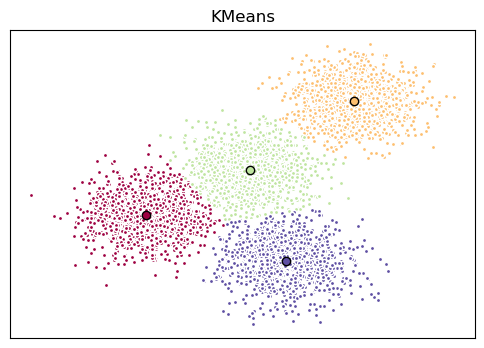

In [14]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [15]:
# Practice
# Try to cluster the above dataset into 3 clusters.
# Notice: do not generate the data again, use the same dataset as above.

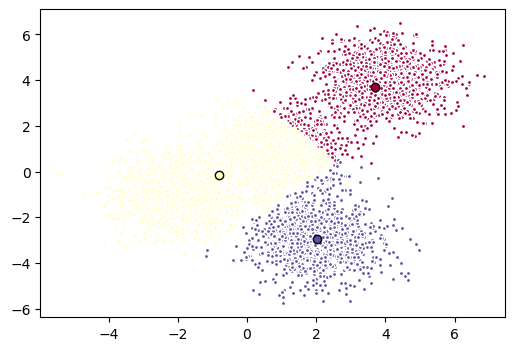

In [16]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

In [17]:
# Customer Segmentation with K-Means
# Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data. Customer segmentation is the 
# practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a 
# business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain 
# customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to 
# retain those customers. Another group might include customers from non-profit organizations and so on.

In [18]:
# Load Data From CSV File
# Before you can work with the data, let's use pandas to read the dataset from IBM Object Storage.

In [19]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [20]:
# Pre-processing
# As you can see, Address in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables 
# because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.

df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [21]:
# Normalizing over the standard deviation
# Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps 
# mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize 
# our dataset.

In [22]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [23]:
# Modeling
# In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have 
# certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process 
# much easier.

# Let's apply k-means on our dataset, and take a look at cluster labels.

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

In [24]:
# Insights
# We assign the labels to each row in the dataframe.

df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [25]:
# We can easily check the centroid values by averaging the features in each cluster.

df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


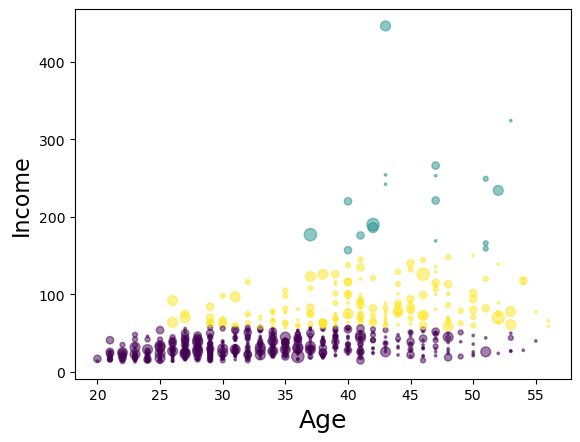

In [26]:
# Now, let's look at the distribution of customers based on their age and income:
area = np.pi * (X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

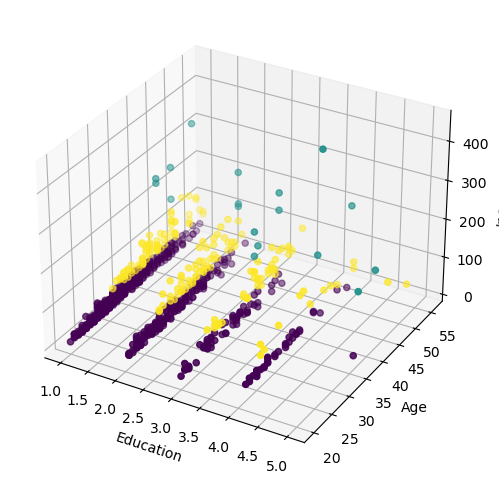

In [28]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(float))

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

plt.show()

In [ ]:
'''
k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar 
to each other demographically. Now we can create a profile for each group, considering the common characteristics of each cluster. For example, 
the 3 clusters can be:

AFFLUENT, EDUCATED AND OLD AGED
MIDDLE AGED AND MIDDLE INCOME
YOUNG AND LOW INCOME
'''